In [181]:
import math
import numpy as np
import pandas as pd 
import sklearn
import datetime
import pandas_datareader.data as web 
from pandas import Series, DataFrame

startDate = datetime.datetime(2019, 1, 1)
endDate   = datetime.datetime(2021, 3, 8)

df = web.DataReader("SPY", 'yahoo', startDate, endDate)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-02,390.070007,386.000000,389.820007,386.540009,79389200.0,386.540009
2021-03-03,386.829987,381.309998,385.790009,381.420013,119482700.0,381.420013
2021-03-04,384.000000,371.880005,381.220001,376.700012,182856500.0,376.700012
2021-03-05,384.760010,372.640015,380.459991,383.630005,151959800.0,383.630005
2021-03-08,387.390015,382.809998,384.660004,385.570007,54273827.0,385.570007


In [182]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
close_px.tail()

Date
2021-03-02    386.540009
2021-03-03    381.420013
2021-03-04    376.700012
2021-03-05    383.630005
2021-03-08    385.570007
Name: Adj Close, dtype: float64

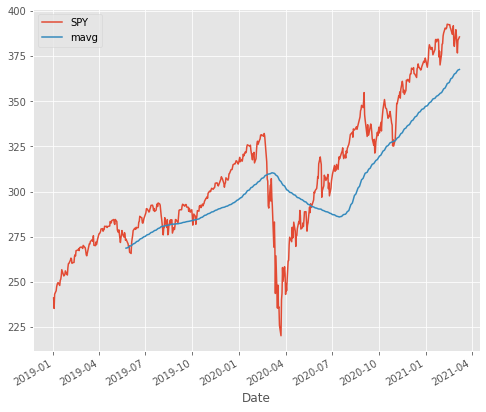

In [183]:
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib as mpl 
mpl.rc('figure', figsize=(8, 7))
mpl.__version__ 

style.use('ggplot')

close_px.plot(label='SPY')
mavg.plot(label='mavg')
plt.legend()

<AxesSubplot:xlabel='Date'>

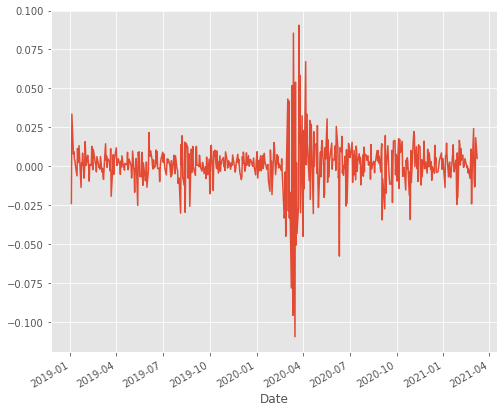

In [184]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [185]:
# Grab data for many equities (in this case, large Tech stocks include in the NASDAQ-100)
dfcomp = web.DataReader([
    'SPY',
    'QQQ',
    'IWM',
    'VGT',
], 'yahoo', start=startDate, end=endDate)['Adj Close']
dfcomp.tail()

Symbols,SPY,QQQ,IWM,VGT
Date,,,,
2021-03-02,386.540009,318.399994,221.720001,361.750000
2021-03-03,381.420013,309.160004,219.320007,351.820007
2021-03-04,376.700012,304.100006,213.190002,342.850006
2021-03-05,383.630005,308.679993,217.710007,348.399994
2021-03-08,385.609985,304.970001,220.940002,344.924988


In [186]:
retscomp = dfcomp.pct_change()
corr     = retscomp.corr()

Text(0.5, 0, 'Returns TSLA')

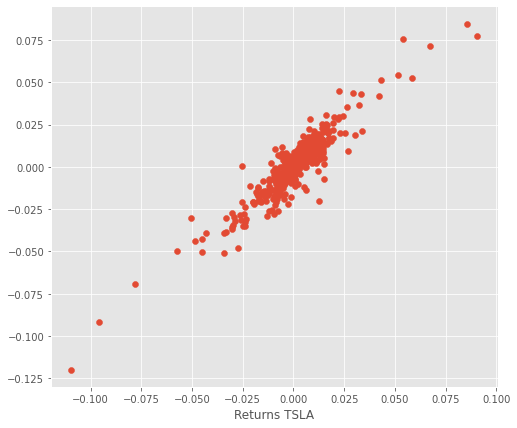

In [187]:
plt.scatter(retscomp.SPY, retscomp.QQQ)
plt.xlabel('Returns AAPL')
plt.xlabel('Returns TSLA')

array([[<AxesSubplot:xlabel='SPY', ylabel='SPY'>,
        <AxesSubplot:xlabel='QQQ', ylabel='SPY'>,
        <AxesSubplot:xlabel='IWM', ylabel='SPY'>,
        <AxesSubplot:xlabel='VGT', ylabel='SPY'>],
       [<AxesSubplot:xlabel='SPY', ylabel='QQQ'>,
        <AxesSubplot:xlabel='QQQ', ylabel='QQQ'>,
        <AxesSubplot:xlabel='IWM', ylabel='QQQ'>,
        <AxesSubplot:xlabel='VGT', ylabel='QQQ'>],
       [<AxesSubplot:xlabel='SPY', ylabel='IWM'>,
        <AxesSubplot:xlabel='QQQ', ylabel='IWM'>,
        <AxesSubplot:xlabel='IWM', ylabel='IWM'>,
        <AxesSubplot:xlabel='VGT', ylabel='IWM'>],
       [<AxesSubplot:xlabel='SPY', ylabel='VGT'>,
        <AxesSubplot:xlabel='QQQ', ylabel='VGT'>,
        <AxesSubplot:xlabel='IWM', ylabel='VGT'>,
        <AxesSubplot:xlabel='VGT', ylabel='VGT'>]], dtype=object)

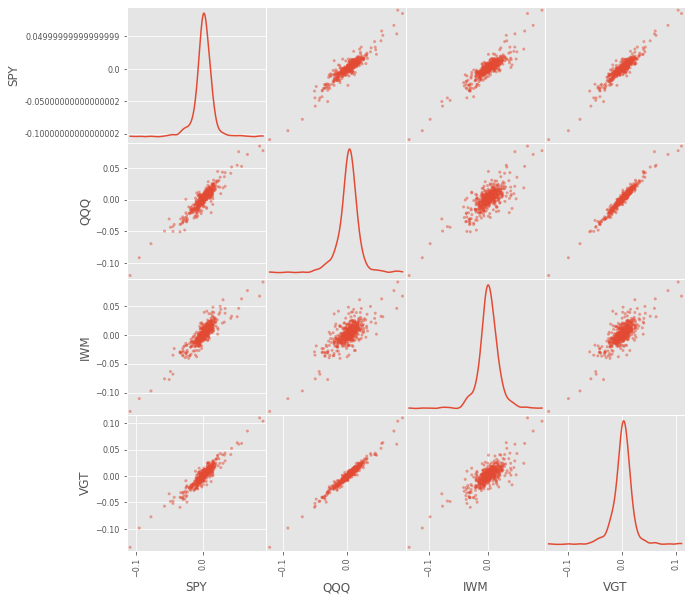

In [188]:
# Plot KDE matrix comparing two securities
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10,10))

([<matplotlib.axis.YTick at 0x7f1f6db760d0>,
 [Text(0, 0, 'SPY'), Text(0, 1, 'QQQ'), Text(0, 2, 'IWM'), Text(0, 3, 'VGT')])

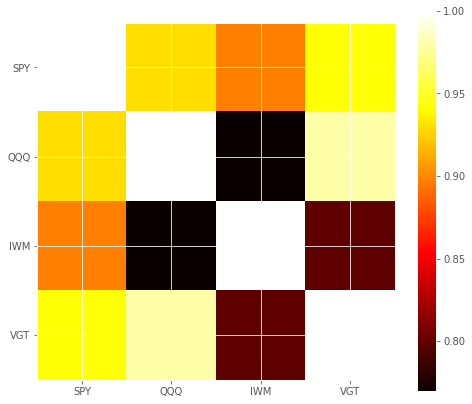

In [189]:
# Plot heatmap for correlations between tech stocks
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

# Risk vs. Return
Plot out a graph that categorizes the risk vs. return of these securities. Missing is a line that determines your risk tolerance across the return spectrum.

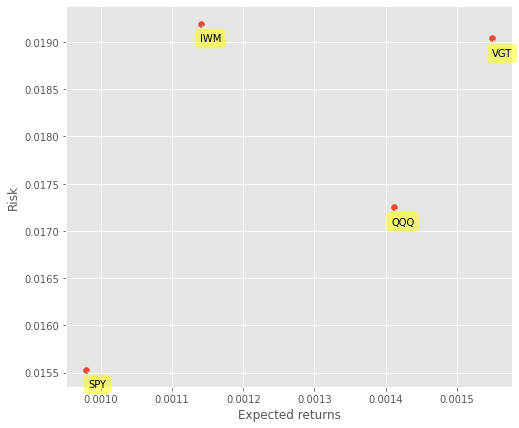

In [190]:
# Plot risk vs. return chart
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, xy = (x,y), xytext = (20, -20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


In [191]:
# Calculate percent change and high/low percentage
dfreg = df.loc[:, ['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-03-02,386.540009,79389200.0,1.052933,-0.841414
2021-03-03,381.420013,119482700.0,1.447221,-1.132739
2021-03-04,376.700012,182856500.0,3.217413,-1.185664
2021-03-05,383.630005,151959800.0,3.159293,0.833205
2021-03-08,385.570007,54273827.0,1.187856,0.236574


# Imports needed for scikit-learn and preprocessing data

In [192]:
# Import scikit packages we need
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline

# Cleaning the data
These next modules clean up the data to prepare it for use with our models.

In [193]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [194]:
# Separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [195]:
# Separate label since we want to predict AdjClose
forecast_col   = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X              = np.array(dfreg.drop(['label'], 1))

In [196]:
# Scale X so all securities have the same distribution
X = preprocessing.scale(X)

In [197]:
X_lately = X[-forecast_out:]
X        = X[:-forecast_out]

In [198]:
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Simple Linear Analysis

In [200]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

# Quadratic Regression

In [201]:
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [202]:
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [203]:
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

# Evaluation
Next we will take a simple approach to evaluating the fitment we've found in the last few steps.

In [204]:
confidencelin   = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test, y_test)
confidencepoly3 = clfpoly3.score(X_test, y_test)
confidenceknn   = clfknn.score(X_test, y_test)

# Regression results

In [205]:
print("Linear regression confidence:\t\t %f" % confidencelin)
print("Quadratic regression 2 confidence:\t %f" % confidencepoly2)
print("Quadratic regression 3 confidence:\t %f" % confidencepoly3)
print("KNN regression confidence:\t\t %f" % confidenceknn)

Linear regression confidence:		 0.959195
Quadratic regression 2 confidence:	 0.961950
Quadratic regression 3 confidence:	 0.937908
KNN regression confidence:		 0.917783


In [206]:
forecast_set = clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan 

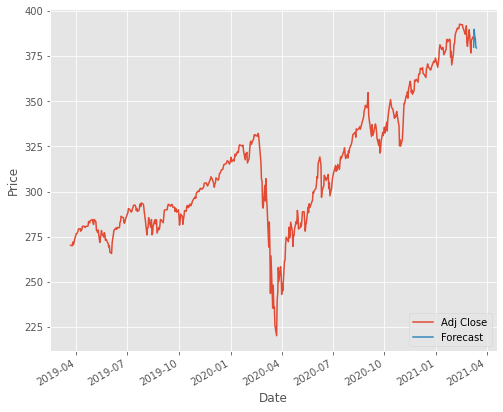

In [207]:
last_date = dfreg.iloc[-1].name 
last_unix = last_date 
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()